In [1]:
%matplotlib inline

In [37]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Read in training set data
sfcrimes = pd.read_csv("train.csv")
sfcrimes.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [48]:
# Model 1: normalized empirical probabilities

## Split into test and training
from sklearn.cross_validation import train_test_split
train, test = train_test_split(sfcrimes, test_size=0.3, random_state=333)

In [44]:
## Predict on testing data based on mean probability for each category 
## in training data
model1 = train["Category"].value_counts()/len(train.index)
model1_pred = np.tile(cat_freq, (len(test.index), 1))
model1_pred.shape

(263415, 39)

In [45]:
## Evaluate Model 1's performance using log-loss metric from Kaggle

from sklearn.metrics import log_loss
log_loss(test["Category"], model1_pred)

5.4545863452285177

In [52]:
# Model 2: using only police district

## Create dummy variables for categorical variable
model2_features = pd.get_dummies(train["PdDistrict"], 
                                 prefix="Pd")
model2_features.head(5)

,Pd_BAYVIEW,Pd_CENTRAL,Pd_INGLESIDE,Pd_MISSION,Pd_NORTHERN,Pd_PARK,Pd_RICHMOND,Pd_SOUTHERN,Pd_TARAVAL,Pd_TENDERLOIN
710747,1,0,0,0,0,0,0,0,0,0
67284,0,0,0,0,0,0,0,1,0,0
269629,0,0,1,0,0,0,0,0,0,0
716054,0,0,0,0,1,0,0,0,0,0
216556,0,0,0,0,0,0,0,0,1,0


In [55]:
## Predict on testing data using ultinomial logistic regression 
## based on police district dummies

from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression().fit(model2_features, 
                                  train["Category"])
model2_pred = model2.predict_proba(pd.get_dummies(test["PdDistrict"], 
                                                  prefix="Pd"))
model2_pred.shape

(263415, 39)

In [56]:
## Evaluate Model 2's performance using log-loss metric from Kaggle

log_loss(test["Category"], model2_pred)

2.6171369510096207

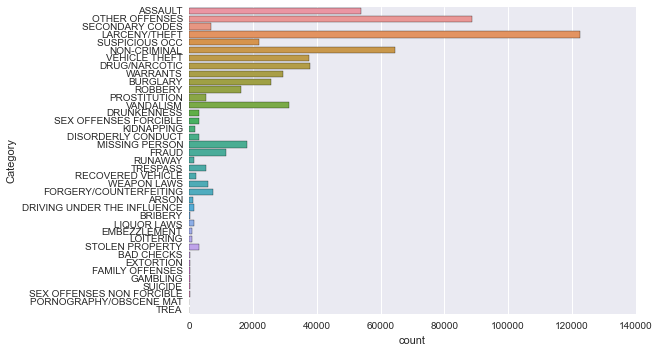

In [98]:
# Some exploratory plots

## Distribution of crime categories

sns.countplot(y="Category", data=train)

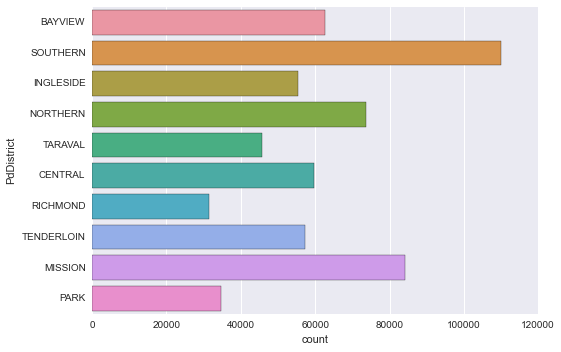

In [97]:
## Distribution of police districts

sns.countplot(y="PdDistrict", data=train)

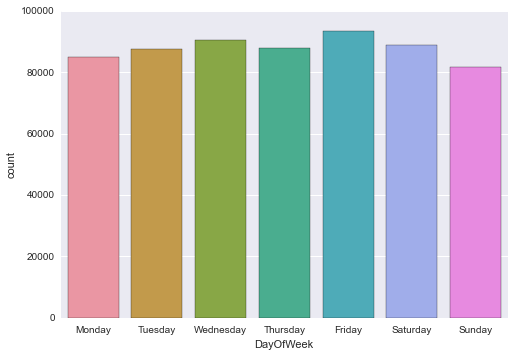

In [96]:
## Distribution of day of week

sns.countplot(x="DayOfWeek",
              data=train,
              order=[x + "day" for x in ["Mon", "Tues", "Wednes", "Thurs",
                                       "Fri", "Satur", "Sun"]])

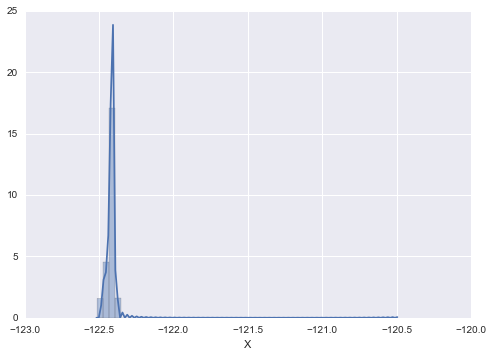

In [105]:
## Distribution of locations

sns.distplot(train["X"])


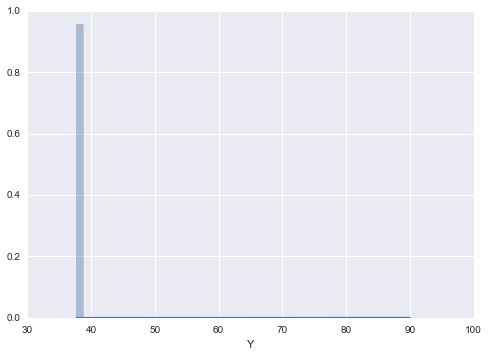

In [104]:
sns.distplot(train["Y"])

In [ ]:
## What to do about extreme outliers in both longitude and latitude?